In [15]:
import cv2,os


data_path='Dataset step 2/Symbols'


In [16]:
categories=os.listdir(data_path)

In [17]:
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) 

print(label_dict)
print(categories)
print(labels)

{'om': 0, 'sriyantra': 1, 'swastika': 2}
['om', 'sriyantra', 'swastika']
[0, 1, 2]


In [18]:
img_size=100
data=[]
target=[]


for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)

        try:
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)           
           
            resized=cv2.resize(gray,(img_size,img_size))
          
            data.append(resized)
            target.append(label_dict[category])
           
        except Exception as e:
            print('Exception:',e)

In [19]:
import numpy as np

data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
target=np.array(target)

from keras.utils import np_utils

new_target=np_utils.to_categorical(target)

In [20]:
np.save('data',data)
np.save('target',new_target)

In [21]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

In [22]:
target.shape, data.shape 

((1490, 3), (1490, 100, 100, 1))

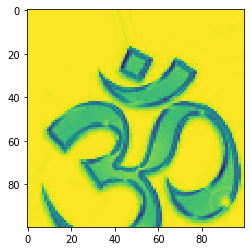

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
X1=data.reshape(data.shape[0],img_size,img_size)
plt.imshow(X1[100]) 
plt.show() 

In [24]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(50,activation='relu'))

model.add(Dense(3,activation='softmax'))


model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])



In [25]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [56]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=12,callbacks=[checkpoint],validation_split=0.2)

Train on 1368 samples, validate on 342 samples
Epoch 1/12
1368/1368 [==============================] - 30s 22ms/step - loss: 0.0430 - accuracy: 0.9868 - val_loss: 0.4225 - val_accuracy: 0.8772
Epoch 2/12
1368/1368 [==============================] - 32s 24ms/step - loss: 0.0313 - accuracy: 0.9912 - val_loss: 0.4617 - val_accuracy: 0.8655
Epoch 3/12
1368/1368 [==============================] - 31s 23ms/step - loss: 0.0464 - accuracy: 0.9861 - val_loss: 0.3858 - val_accuracy: 0.8889
Epoch 4/12
1368/1368 [==============================] - 33s 24ms/step - loss: 0.0219 - accuracy: 0.9949 - val_loss: 0.4140 - val_accuracy: 0.8830
Epoch 5/12
1368/1368 [==============================] - 52s 38ms/step - loss: 0.0158 - accuracy: 0.9971 - val_loss: 0.4120 - val_accuracy: 0.8889
Epoch 6/12
1368/1368 [==============================] - 58s 42ms/step - loss: 0.0145 - accuracy: 0.9993 - val_loss: 0.4673 - val_accuracy: 0.8772
Epoch 7/12
1368/1368 [==============================] - 58s 43ms/step - loss:

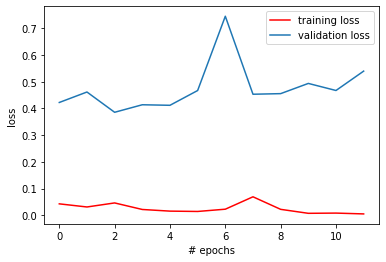

In [57]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


In [58]:
print(model.evaluate(test_data,test_target))

190/190 [==============================] - 2s 9ms/step
[0.2267562539169663, 0.9368420839309692]


In [ ]:
model.save('Symbol-Only.h5')